In [42]:
%matplotlib inline
import sys
sys.path.append("/Users/edwardlrichards/swellEx") 

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import datetime as d
import swellEx_env

import loadSIO as sio

# Step by step matched field

In [50]:
# Experimental data
dataFile_proc = '/Users/edwardlrichards/swellEx/data/J1312315.vla.21els.sio'
dataFile_full = '/Users/edwardlrichards/Documents/data/SWellEx96/VLA_J131_2332'

fullTestIndex = 63
processedTestIndex = 0

fs = 1500
tStart = (32-15) * 60
processedOffset = tStart * fs

In [51]:
# dataFull = sio.load_selection(dataFile_full, -1, 0, [0], channelNames=arrayFull)

In [52]:
# (dataFull['data'].shape[0] / fs) % 60 * 1500

In [53]:
arrayProc = swellEx_env.loadArray(reducedIndex=True, flipArray=False)
arrayFull = swellEx_env.loadArray(reducedIndex=False)

In [54]:
dataFull = sio.load_selection(dataFile_full, 0, 1e3, -1, channelNames=arrayFull)
dataFull['data'] -= np.mean(dataFull['data'], axis=0)[None, :]

searchData = sio.load_selection(dataFile_proc, -1, 0, [0], channelNames=arrayProc)
searchData['data'] = np.squeeze(searchData['data'])
searchData['data'] -= np.mean(searchData['data'])

In [55]:
print(dataFull['channelName'].iloc[fullTestIndex])
print(searchData['channelName'].iloc[processedTestIndex])

94.02
212.25


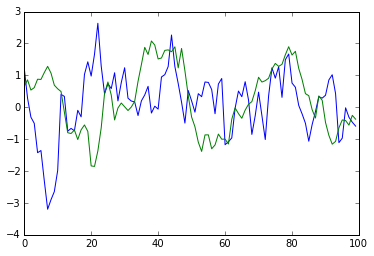

In [56]:
plotIndex = np.arange(int(1e2))
firstChannels = np.vstack((dataFull['data'][plotIndex, fullTestIndex],\
                           searchData['data'][plotIndex + processedOffset + 1311])).T
firstChannels /= np.sqrt(np.var(firstChannels, axis=0))[None,:]
_ = plt.plot(firstChannels)

In [33]:
corrLength = 100
corrData = dataFull['data'][:corrLength, fullTestIndex]
corrData = corrData - np.mean(corrData)
tSearch = np.correlate(searchData, corrData, mode='valid')

ValueError: object of too small depth for desired array

In [279]:
offset = np.argmax(np.abs(tSearch))

In [280]:
offset

629447

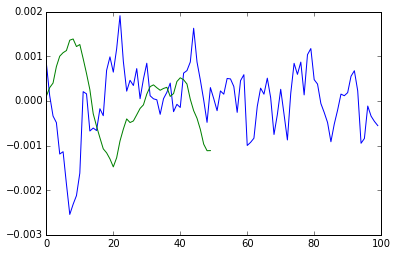

In [281]:
p1 = dataFull['data'][:, fullTestIndex] / 1
p1 -= np.mean(p1)

p2 = searchData[offset:offset+50]
p2 -= np.mean(p2)

_ = plt.plot(p1)
_ = plt.plot(p2)